Dataset - Maquinas Expendedoras de Alimentos

El dataset representa un conjunto de maquinas expendedoras de alimentos con varias localizaciones en el centro de New Jersey, las localizaciones incluyen una libreria, un centro comercial, una oficina y una fabrica.

La idea es entender la tendencia de compra de los usuarios de acuerdo a la ubicación de las maquinas, optimizar el inventario de las maquinas teniendo en cuenta esta tendencia.

¿Qué deseamos responder?

1- Top 10 ventas por ubicación.
2- Cantidad de ventas por categoria / ubicación.
3- Representación visual ventas Categoria / Ubicación.
4- Promedio venta total por transacción.
5- Comparación entre las ubicación y sus ventas.

Ubicación de las Maquinas:

Gutten Plans: Fabrica que trabajan 24/5.
EB Public Library: Biblioteca con alto flujo peatonal 5-6 días a la semana. 
Brunswick Sq Mall: Centro comercial con trafico peatonal 7 dias a las semana (dos maquinas)
Earle Asphalt: ubicada en una empresa que trabaja 5 días a la semana.

Información dataset https://www.kaggle.com/datasets/awesomeasingh/vending-machine-sales/

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
mpl.style.use('bmh')




In [2]:
url = 'https://github.com/wilmerd1/PythonCoderHouse/blob/main/Vending_%20Machine_Sales/Vending_Machine_Sales.xlsx?raw=true'
myfile = requests.get(url)
df = pd.read_excel (myfile.content)

In [3]:
df.shape

(6445, 21)

In [4]:
df.dtypes

Status          object
Device ID       object
Location        object
Machine         object
Product         object
Category        object
Transaction      int64
TransDate       object
Type            object
RCoil            int64
RPrice         float64
RQty             int64
MCoil            int64
MPrice         float64
MQty             int64
LineTotal      float64
TransTotal     float64
Prcd Date       object
Month            int64
Day              int64
Year             int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6445 entries, 0 to 6444
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       6445 non-null   object 
 1   Device ID    6445 non-null   object 
 2   Location     6445 non-null   object 
 3   Machine      6445 non-null   object 
 4   Product      6441 non-null   object 
 5   Category     6260 non-null   object 
 6   Transaction  6445 non-null   int64  
 7   TransDate    6445 non-null   object 
 8   Type         6445 non-null   object 
 9   RCoil        6445 non-null   int64  
 10  RPrice       6445 non-null   float64
 11  RQty         6445 non-null   int64  
 12  MCoil        6445 non-null   int64  
 13  MPrice       6444 non-null   float64
 14  MQty         6445 non-null   int64  
 15  LineTotal    6445 non-null   float64
 16  TransTotal   6445 non-null   float64
 17  Prcd Date    6445 non-null   object 
 18  Month        6445 non-null   int64  
 19  Day   

In [6]:
df.columns

Index(['Status', 'Device ID', 'Location', 'Machine', 'Product', 'Category',
       'Transaction', 'TransDate', 'Type', 'RCoil', 'RPrice', 'RQty', 'MCoil',
       'MPrice', 'MQty', 'LineTotal', 'TransTotal', 'Prcd Date', 'Month',
       'Day', 'Year'],
      dtype='object')

In [7]:
df.head(5)

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,...,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date,Month,Day,Year
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,"Saturday, January 1, 2022",Credit,148,...,1,148,3.5,1,3.5,3.5,2022-01-01 00:00:00,1,1,2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,"Saturday, January 1, 2022",Credit,148,...,1,148,3.5,1,3.5,5.0,2022-01-01 00:00:00,1,1,2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,"Saturday, January 1, 2022",Credit,123,...,1,123,1.5,1,1.5,5.0,2022-01-01 00:00:00,1,1,2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,"Saturday, January 1, 2022",Credit,123,...,1,123,1.5,1,1.5,1.5,2022-01-01 00:00:00,1,1,2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,"Saturday, January 1, 2022",Credit,148,...,1,148,3.5,1,3.5,3.5,2022-01-01 00:00:00,1,1,2022


In [8]:
#validamos si en nuestro data set tenemos valores NaN
df.isnull().values.any()

True

In [9]:
#verificamos en que columnas se encuentran estos valores NaN
df.isnull().any()

Status         False
Device ID      False
Location       False
Machine        False
Product         True
Category        True
Transaction    False
TransDate      False
Type           False
RCoil          False
RPrice         False
RQty           False
MCoil          False
MPrice          True
MQty           False
LineTotal      False
TransTotal     False
Prcd Date      False
Month          False
Day            False
Year           False
dtype: bool

In [10]:
#contamos la cantidad de valores NaN por columna
df.isnull().sum()

Status           0
Device ID        0
Location         0
Machine          0
Product          4
Category       185
Transaction      0
TransDate        0
Type             0
RCoil            0
RPrice           0
RQty             0
MCoil            0
MPrice           1
MQty             0
LineTotal        0
TransTotal       0
Prcd Date        0
Month            0
Day              0
Year             0
dtype: int64

In [11]:
#contabilizamos la cantidad de valores NaN
df.isnull().sum().sum()

190

In [12]:
#eliminamos los registros vacios dado que son Categoricos 
df = df.dropna(how='any')


In [13]:
# validamos como nos quedo el dataset (Se eliminaron 185 Registros)
df.shape

(6260, 21)

In [14]:
df.describe()

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Month,Day,Year
count,6.260000e+03,6260.000000,6260.000000,6260.000000,6260.000000,6260.000000,6260.000000,6260.000000,6260.000000,6260.000000,6260.000000,6260.0
mean,1.512922e+10,132.956869,1.902756,1.012780,132.956869,1.902756,1.012780,1.924840,2.155831,5.075559,16.343291,2022.0
std,3.000865e+08,12.769844,0.639897,0.119231,12.769844,0.639897,0.119231,0.672392,1.025380,2.168831,8.995599,0.0
min,1.451578e+10,110.000000,1.000000,1.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.0
25%,1.490184e+10,122.000000,1.500000,1.000000,122.000000,1.500000,1.000000,1.500000,1.500000,3.000000,9.000000,2022.0
50%,1.515571e+10,138.000000,1.500000,1.000000,138.000000,1.500000,1.000000,1.500000,1.500000,5.000000,16.000000,2022.0
75%,1.538508e+10,144.000000,2.500000,1.000000,144.000000,2.500000,1.000000,2.500000,2.500000,7.000000,24.000000,2022.0
max,1.560392e+10,165.000000,5.000000,3.000000,165.000000,5.000000,3.000000,8.000000,8.000000,8.000000,31.000000,2022.0


In [15]:
pd.unique(df['Location'])

array(['Brunswick Sq Mall', 'Earle Asphalt', 'GuttenPlans',
       'EB Public Library'], dtype=object)

In [16]:
pd.unique(df['Category'])

array(['Carbonated', 'Food', 'Non Carbonated', 'Water'], dtype=object)

In [17]:
pd.unique(df['Machine'])

array(['BSQ Mall x1366 - ATT', 'BSQ Mall x1364 - Zales',
       'Earle Asphalt x1371', 'GuttenPlans x1367',
       'EB Public Library x1380'], dtype=object)

In [18]:
pd.unique(df['Product'])

array(['Red Bull - Energy Drink - Sugar Free',
       'Takis - Hot Chilli Pepper & Lime',
       'Bai Antioxidant - Brasilia BB',
       "Miss Vickie's Potato Chip - Sea Salt & Vinega",
       "Miss Vickie's Potato Chip - Lime & Cracked Pe",
       'Monster Energy Original',
       'Seapoint Farms Dry Roasted Edamame - Wasabi',
       'Snapple Diet Tea - Lemon', 'Skinny Pop Popcorn',
       'Stretch Island Fruit Leathers Snacks - Variet',
       'KitKat - Crisp Wafers', 'Wonderful Pistachios - Variety',
       'Spindrift - Sparkling Water  Lime',
       "Miss Vickie's Potato Chip - Sea Salt Original",
       'Jacks Links Bar Beef Strip',
       'Vitamin Water - XXX Acai BB Pomegranate',
       'Cheetos - Fleming Hot Crunchy',
       'Pure Organic Fruit Bar - Strawberry Banana', 'Oreo Mini',
       'Nutter Butter Bites', 'Jack Links Beef Steak Original',
       "Robert Irvine's - Fit Crunch -  Chocolate Pea",
       'Good Health Veggie Stix - Zesty Ranch',
       'Cheetos Baked - Flamin

In [19]:
df['TransTotal'].describe()

count    6260.000000
mean        2.155831
std         1.025380
min         1.000000
25%         1.500000
50%         1.500000
75%         2.500000
max         8.000000
Name: TransTotal, dtype: float64

In [20]:
grouped_data = df.groupby('Category')
grouped_data.describe()
grouped_data.mean()

C:\Windows\Temp\ipykernel_13788\1674823081.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data.mean()


,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Month,Day,Year
Category,,,,,,,,,,,,
Carbonated,1.510553e+10,142.880415,2.057047,1.006101,142.880415,2.057047,1.006101,2.067267,2.140635,4.898109,16.368517,2022.0
Food,1.513296e+10,124.250292,1.702232,1.016044,124.250292,1.702232,1.016044,1.729653,2.045216,5.105018,16.312135,2022.0
Non Carbonated,1.516543e+10,144.353521,2.551056,1.004225,144.353521,2.551056,1.004225,2.561972,2.809507,5.340845,16.383099,2022.0
Water,1.512978e+10,144.322981,1.849379,1.024845,144.322981,1.849379,1.024845,1.890269,2.031573,5.078675,16.420290,2022.0


In [21]:
frame = df.Location.value_counts().to_frame('Recuento')
frame.head()

,Recuento
GuttenPlans,2524
EB Public Library,1834
Brunswick Sq Mall,1226
Earle Asphalt,676


Text(0, 0.5, 'Ventas')

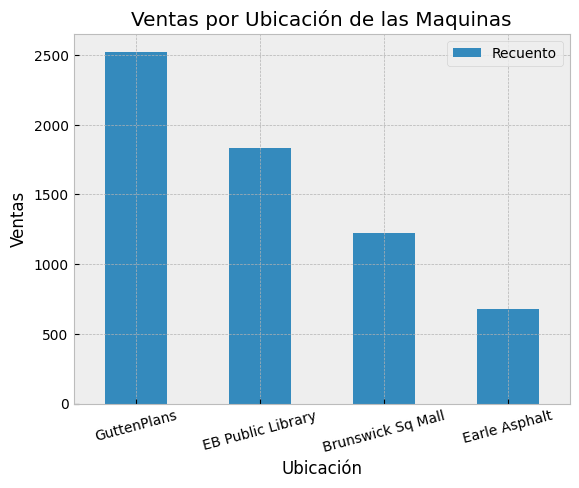

In [22]:
#Primer ejercicio de visualización Grafico de Barras
frame.plot(kind='bar')
plt.xticks(rotation=15, horizontalalignment="center")
plt.title("Ventas por Ubicación de las Maquinas")
plt.xlabel('Ubicación')
plt.ylabel('Ventas')

#Se puede observar que la maquinas ubicadas en GuttenPlans y Eb Public Library tienen mejor ventas

Text(0, 0.5, 'Ventas')

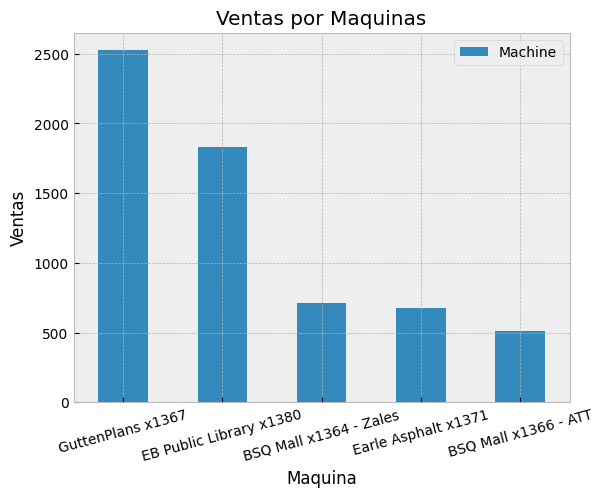

In [23]:
#Cantidad de Transacciones por Maquina
data=df.Machine.value_counts().to_frame()
data.plot(kind='bar')
plt.xticks(rotation=15, horizontalalignment="center")
plt.title("Ventas por Maquinas")
plt.xlabel('Maquina')
plt.ylabel('Ventas')

#Las maquinas ubicadas en el centro comercial y en Earle Asphalt tienen un promedio de venta similar

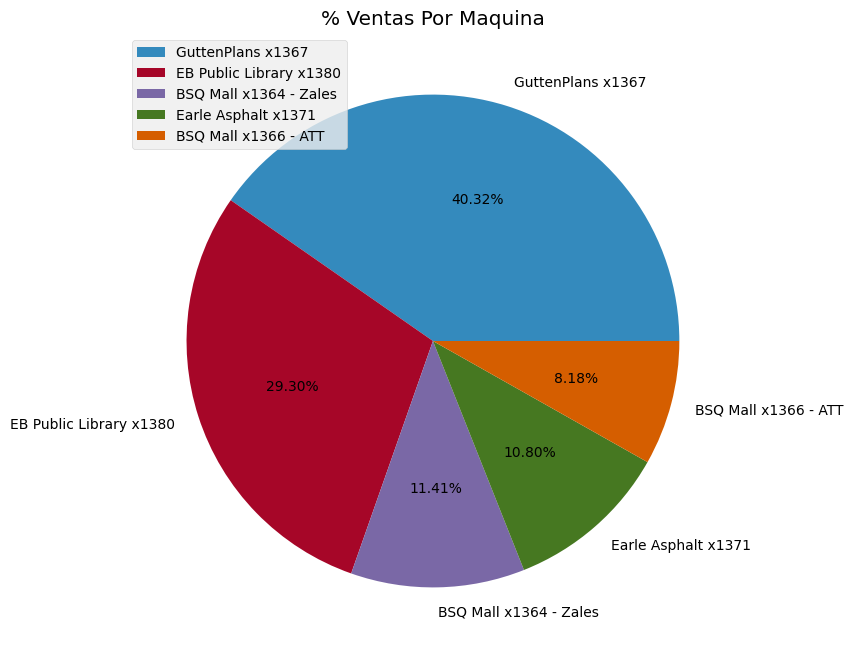

In [50]:
# Gráfico Pie % Ventas por Maquinas
plot = df['Machine'].value_counts().plot(
            kind='pie',autopct="%.2f%%", 
            figsize=(8,8), title='% Ventas Por Maquina', label="")
plot.legend(loc='upper left')



Text(0, 0.5, 'Categorias')

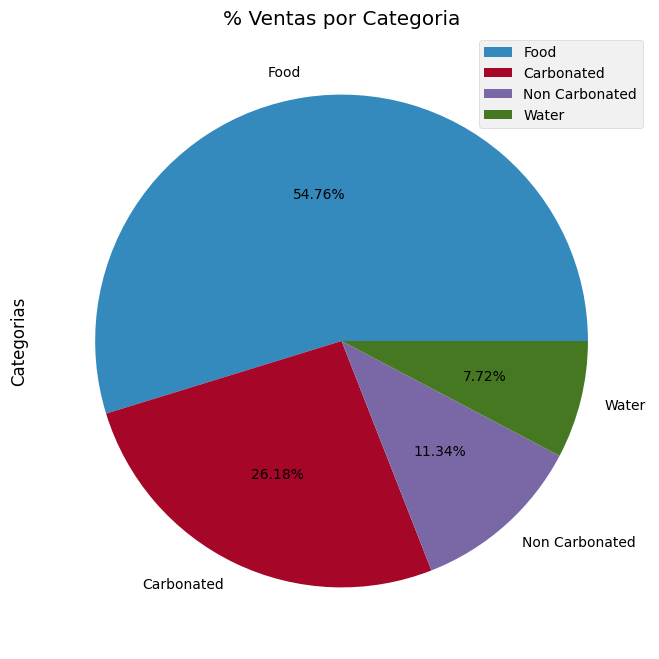

In [51]:
#Cantidad de Transacciones por Maquina
plot = df['Category'].value_counts().plot(
            kind='pie',autopct='%.2f%%', figsize=(8,8), title='% Ventas por Categoria',)
plt.legend()
plt.ylabel('Categorias')

#Observamos que más del 54% de las ventas es la categoria de Comida

In [26]:
tablacruzada = pd.crosstab(index=df['Location'],columns=df['Category'], margins=True)
print(tablacruzada)

Category           Carbonated  Food  Non Carbonated  Water   All
Location                                                        
Brunswick Sq Mall         221   538             181    286  1226
EB Public Library         279  1097             275    183  1834
Earle Asphalt              43   591              28     14   676
GuttenPlans              1096  1202             226      0  2524
All                      1639  3428             710    483  6260


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Brunswick Sq Mall'),
  Text(1, 0, 'EB Public Library'),
  Text(2, 0, 'Earle Asphalt'),
  Text(3, 0, 'GuttenPlans')])

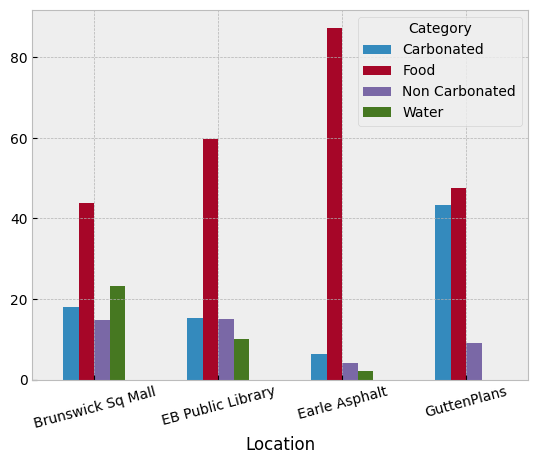

In [27]:
plot = pd.crosstab(index=df['Location'], 
                   columns=df['Category']).apply(lambda r: r/r.sum()
                                                 *100,axis=1).plot(kind='bar')
plt.xticks(rotation=15, horizontalalignment="center")

#creamos una grafica de tabla cruzada para ver las ventas por categoria en cada ubicación

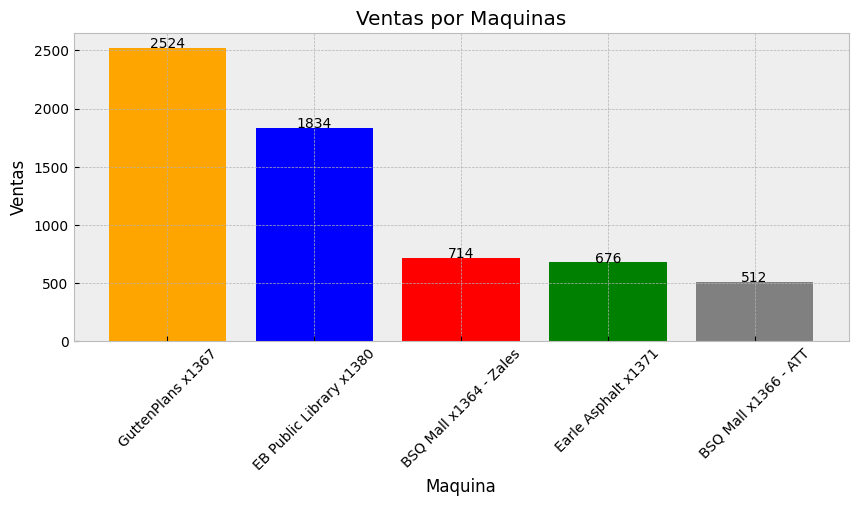

In [52]:
#Mejoramos la visualización Grafico de Barras
fig, ax = plt.subplots(figsize=(10,4))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

colores = ('Orange', 'Blue', 'Red', 'Green', 'Gray')
x = df.Machine.value_counts().index
y = df.Machine.value_counts()

plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Ventas por Maquinas")
plt.xlabel('Maquina')
plt.ylabel('Ventas')
addlabels(x, y)
ax.bar(x, y, color=colores)

plt.show()

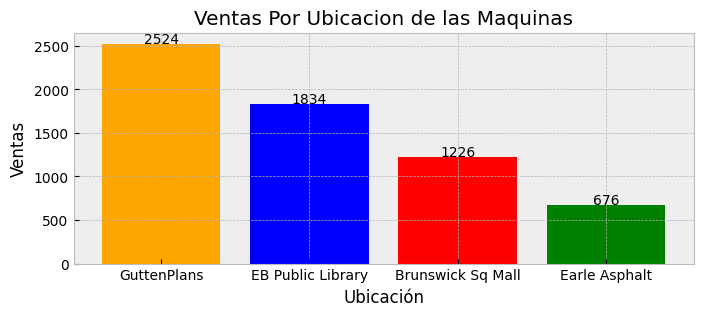

In [54]:
#Mejoramos la visualización Grafico de Barras Ventas por Ubicación
fig, ax = plt.subplots(figsize=(8,3))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

colores = ('Orange', 'Blue', 'Red', 'Green', 'Gray')
x = df.Location.value_counts().index
y = df.Location.value_counts()

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Ventas Por Ubicacion de las Maquinas")
plt.xlabel('Ubicación')
plt.ylabel('Ventas')
addlabels(x, y)
ax.bar(x, y, color=colores)

plt.show()

In [32]:
#top
top20 = df.Product.value_counts().nlargest(10)
#top20 = df['Product'].value_counts().nlargest(10)
print(top20)

Coca Cola - Zero Sugar                   517
Monster Energy Original                  385
Poland Springs Water                     300
KitKat - Crisp Wafers                    260
Sunkist Soda - Orange                    217
Red Bull - Original                      157
Coca Cola - Regular                      155
Wonderful Pistachios - Variety           144
CheezIt - Original                       138
SunChips Multigrain - Harvest Cheddar    131
Name: Product, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BSQ Mall x1366 - ATT'),
  Text(1, 0, 'BSQ Mall x1364 - Zales'),
  Text(2, 0, 'Earle Asphalt x1371'),
  Text(3, 0, 'GuttenPlans x1367'),
  Text(4, 0, 'EB Public Library x1380')])

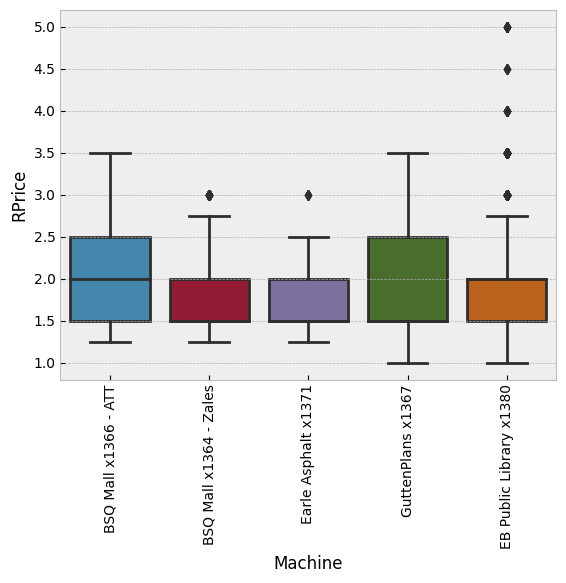

In [56]:
#boxplot precio venta / Maquina
sns.boxplot(x='Machine', y='RPrice', data=df)
plt.xticks(rotation=90, horizontalalignment="center")

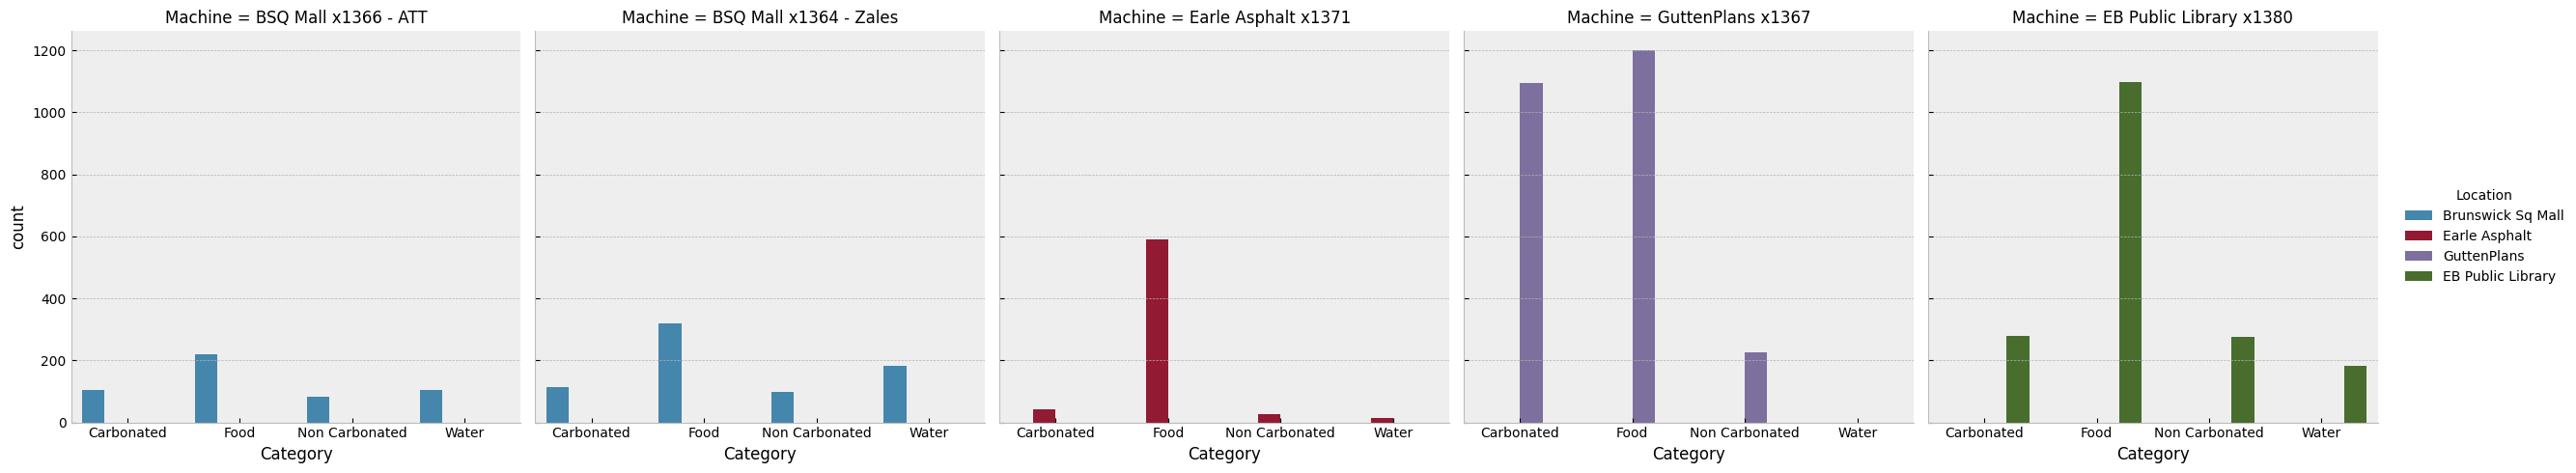

In [38]:
#fraccionamos visualmente las ventas de categoria / ubicacion
sns.catplot(x='Category', kind="count", data=df, hue='Location', col='Machine')
#Se puede observar que no hay ventas de agua y baja ventas de bebidas no carbonatadas en la ubicación de GuttenPlans
#En Earle Asphalt se puede observar un alto nivel de ventas de comida

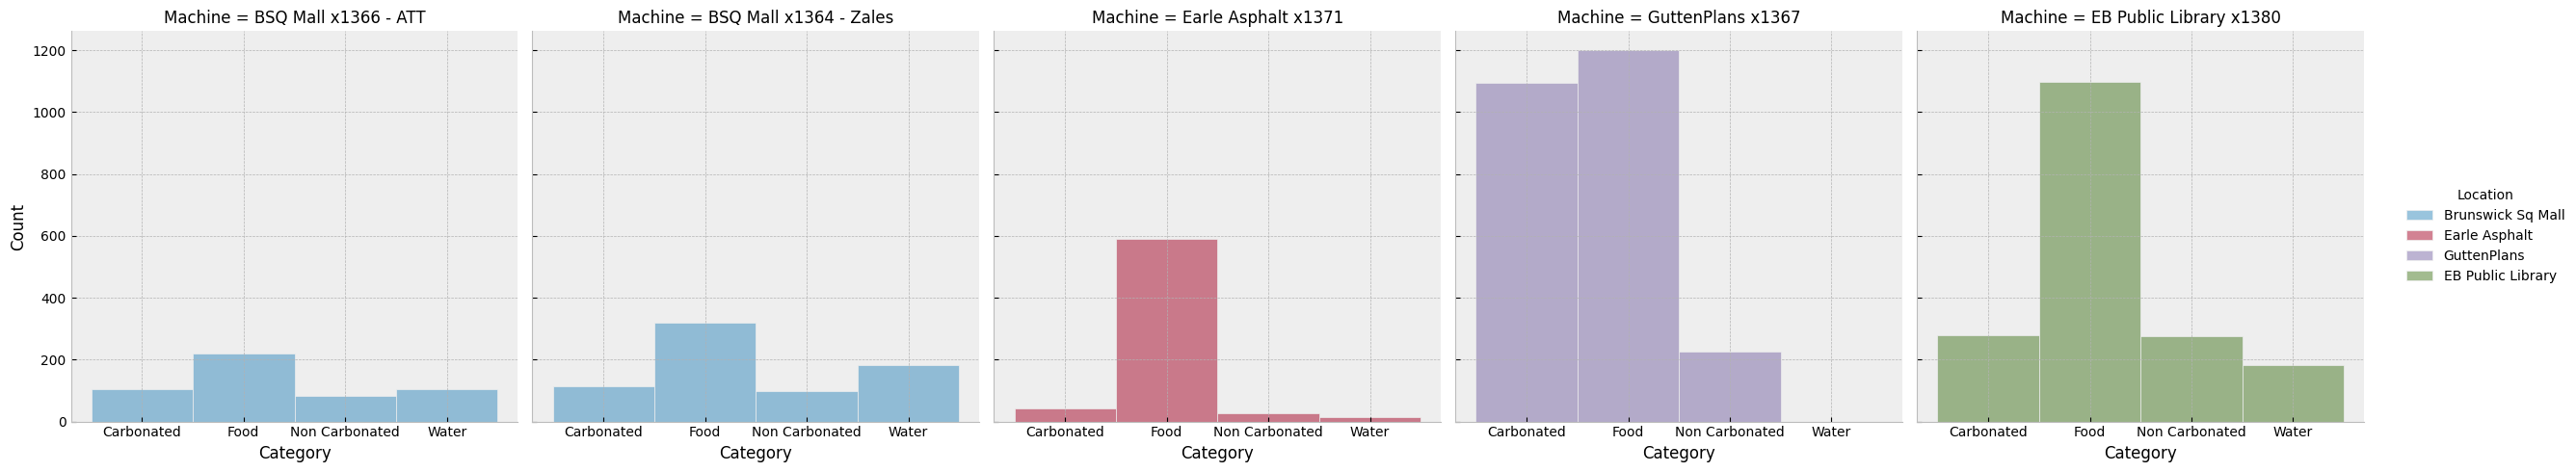

In [39]:
#fraccionamos visualmente las ventas de categoria / ubicacion
sns.displot(x='Category', data=df, hue='Location', col='Machine')
#Las dos maquinas ubicadas en el centro comercial tienen ventas regulares comparadas por categoria

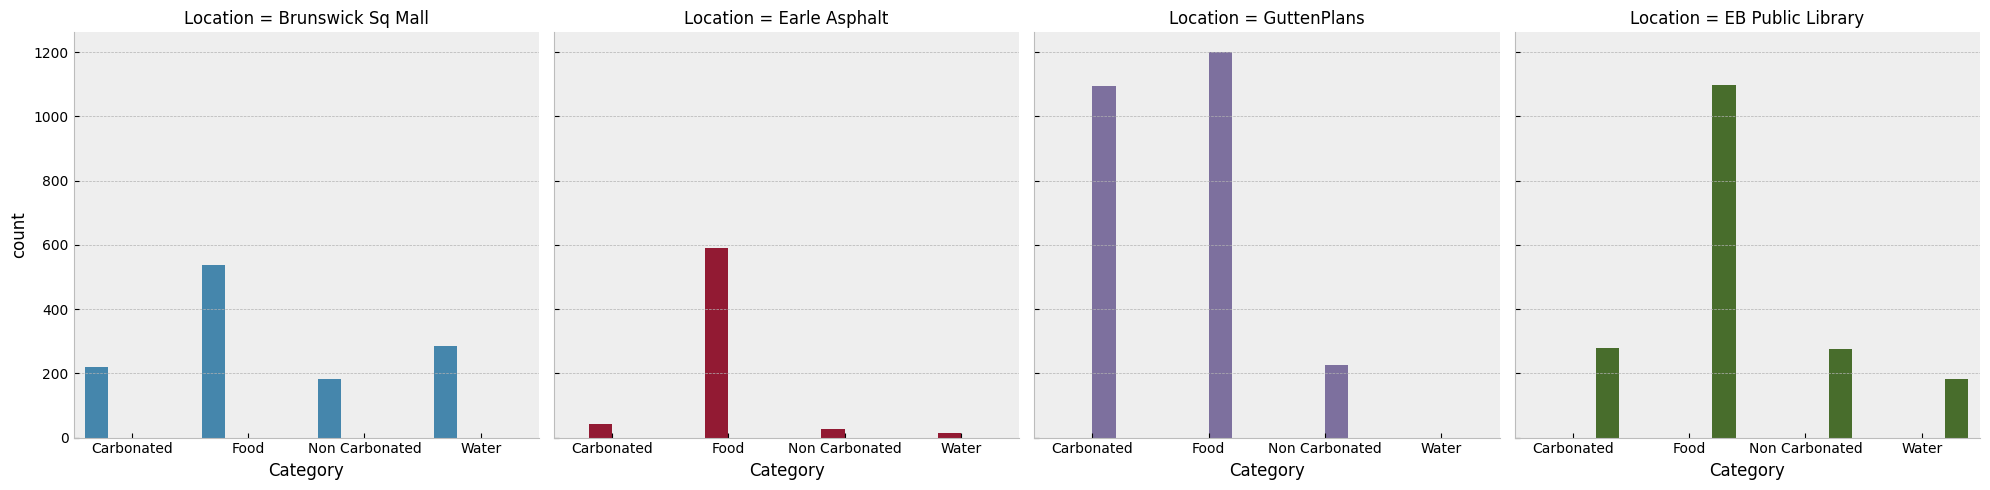

In [49]:
sns.catplot(x='Category', kind="count", data=df, hue='Location', col='Location')